In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

## Zapoznanie z danymi

In [41]:
data = pd.read_csv("./data/bank-full.csv")
data.shape

(45211, 17)

In [42]:
df = data.iloc[:,0:8]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [43]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


Brak nulli, 2 cechy liczbowe i 6 kategorycznych

### Age

In [44]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Jak widzimy, wartości są prawdopodobne - min = 18 i max = 95. Z tego powodu nie przewiduje żadnych outlierów.

Jednak, jako że wiek liczbowo może nie być odpowiedni, postanowiliśym zakodować wiek zależnie od różnych grup wiekowych:

In [45]:
def age_group(age):
    if 18 <= age <= 25:
        return '18-25'
    if 25 < age <= 40:
        return '25-40'
    if 40 < age <= 55:
        return '40-55' 
    if 55 < age <= 70:
        return '55-70' 
    return '70+'

In [46]:
df['age'] = data['age'].apply(lambda x: age_group(x))

In [47]:
df['age'].value_counts()

age
25-40    23381
40-55    15594
55-70     4413
18-25     1336
70+        487
Name: count, dtype: int64

age_enc = LabelEncoder()
age_enc.fit(df['age'])
df['age'] = age_enc.transform(df['age'])

df['age']

Zakodowaliśmy 

### Balance

In [13]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: xlabel='balance', ylabel='Count'>

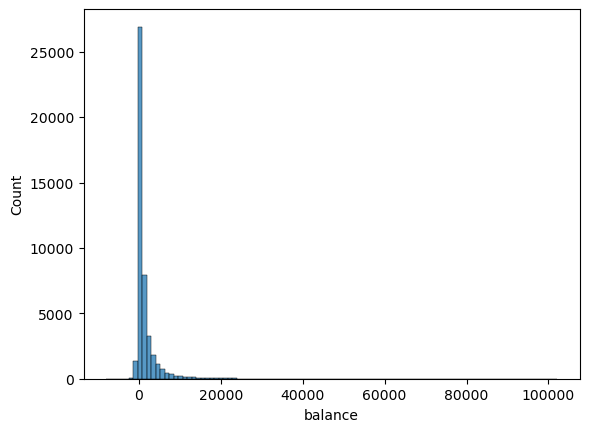

In [50]:
sns.histplot(df.balance, bins=100)

Widzimy bardzo lewoskośny zbiór. Z tego powodu użyjemy skalowania logarytmem:

In [52]:
df['balance'] = data['balance'].apply(lambda x: np.log(x + 1))

<Axes: xlabel='balance', ylabel='Count'>

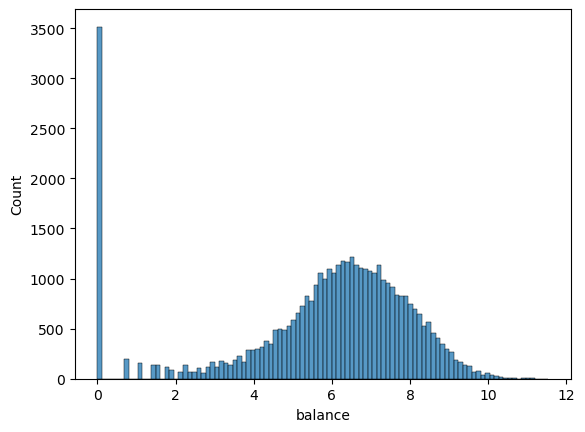

In [53]:
sns.histplot(df.balance, bins=100)

Jak widzimy, sytuacja znacznie się poprawiła.

### Default, Housing, loan

Te 3 cechy są prostymi binarnymi o wartościach yes i no.

In [55]:
bin_enc = LabelEncoder()

In [56]:
bin_enc.fit(df.default)

LabelEncoder()

In [62]:
df.default = bin_enc.transform(df.default)

In [67]:
df.loan = bin_enc.transform(df.loan)

In [66]:
df.housing = bin_enc.transform(df.housing)

### Job, Education, Marital

In [68]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [88]:
encoder = OneHotEncoder()
encoder.fit(df[['job', 'age', 'education','marital']])

OneHotEncoder()

In [95]:
df_coded = pd.DataFrame(encoder.transform(df[['job', 'age', 'education','marital']]).toarray())

In [96]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['18-25', '25-40', '40-55', '55-70', '70+'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object)]

In [97]:
df_coded.columns = encoder.get_feature_names_out()

In [98]:
df_coded

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age_40-55,age_55-70,age_70+,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [104]:
df_pp = df_coded.join([df.default, df.housing, df.balance, df.loan])

In [105]:
df_pp

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,default,housing,balance,loan
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,1,7.670429,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0,1,3.401197,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,1,1.098612,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0,1,7.317876,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.693147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0,6.716595,0
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,7.455877,0
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,0,8.651025,0
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,0,6.505784,0
